<a href="https://colab.research.google.com/github/Muneeb21-hub/Landing_Page/blob/main/LAB_TAXI_Q_LEARNIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
env = gym.make("Taxi-v3").env

# Q table 500 sample(observation space = 5*5*5*4 = 500)
# 6 action (left, right, up, down,pickup, gropout)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [12]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
# plotting metric
reward_list = []
dropout_list = []

In [13]:
episode_number = 10000

for i in range(1, episode_number):

    # init environment
    state = env.reset()

    reward_count = 0
    dropouts = 0

    while True:

        # exploit vs explore to find action epsilon 0.1 => % 10 explore %90 explotit
        if random.uniform(0,1) < epsilon:
            action = np.argmax(q_table[state])
        else:
            action = np.argmax(q_table[state])

        # aaction process and take reward / take observation

        next_state, reward, done, _ = env.step(action)

        # q learning funct

        old_value = q_table[state, action] # old value
        next_max = np.max(q_table[next_state]) # next max
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)

        # q table update
        q_table[state,action] = next_value

        # update state
        state = next_state

        # find wrong dropout

        if reward == -10:
            dropouts += 1

        if done:
            break

        reward_count += reward
    if i%10 == 0:

        dropout_list.append(dropouts)
        reward_list.append(reward_count)
        print("Episode: {}, reward {}, wrong  dropout {}".format(i, reward_count,dropouts))


Episode: 10, reward -445, wrong  dropout 0
Episode: 20, reward -1054, wrong  dropout 42
Episode: 30, reward -265, wrong  dropout 2
Episode: 40, reward -994, wrong  dropout 51
Episode: 50, reward -182, wrong  dropout 0
Episode: 60, reward -460, wrong  dropout 4
Episode: 70, reward -183, wrong  dropout 0
Episode: 80, reward -148, wrong  dropout 0
Episode: 90, reward -301, wrong  dropout 14
Episode: 100, reward -777, wrong  dropout 48
Episode: 110, reward -180, wrong  dropout 4
Episode: 120, reward -138, wrong  dropout 0
Episode: 130, reward -210, wrong  dropout 12
Episode: 140, reward -527, wrong  dropout 30
Episode: 150, reward -351, wrong  dropout 20
Episode: 160, reward -98, wrong  dropout 0
Episode: 170, reward -169, wrong  dropout 4
Episode: 180, reward -71, wrong  dropout 4
Episode: 190, reward -199, wrong  dropout 2
Episode: 200, reward -114, wrong  dropout 1
Episode: 210, reward -202, wrong  dropout 10
Episode: 220, reward -93, wrong  dropout 2
Episode: 230, reward -15, wrong  dr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


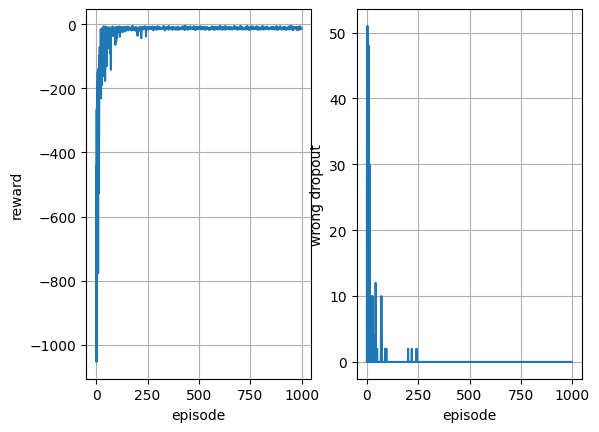

In [14]:
fig, axs = plt.subplots(1,2)

axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")

axs[1].plot(dropout_list)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("wrong dropout")

axs[0].grid(True)
axs[1].grid(True)
plt.show()